A local school district has a goal to reach a 95% graduation rate by the end of the
decade by identifying students who need intervention before they drop out of
school. As a software engineer contacted by the school district, your task is to
model the factors that predict how likely a student is to pass their high school final
exam, by constructing an intervention system that leverages supervised learning
techniques. The board of supervisors has asked that you find the most effective
model that uses the least amount of computation costs to save on the budget. You
will need to analyze the dataset on students' performance and develop a model
that will predict a given student will pass, quantifying whether an intervention is
necessary.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('student-data.csv')
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [4]:
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [5]:
df.shape

(395, 31)

In [6]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
totalstud=df.shape[0]
totalstud
passtu=df[df['passed']=='yes'].shape[0]
failstu=df[df['passed']=='no'].shape[0]
percentage=(passtu/totalstud)*100
percentage

67.08860759493672

In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [10]:
#Here the target variable is 'passed'
df['passed'].value_counts

<bound method IndexOpsMixin.value_counts of 0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object>

In [11]:
# Encode target variable 'Passed'
enc = {'yes':1, 'no':0}
df['passed'] = df['passed'].map(enc)

In [12]:
df['passed'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: passed, Length: 395, dtype: int64>

In [13]:
x=df.drop(['passed'],axis=1)

In [14]:
y=pd.DataFrame(df['passed'])

In [15]:
x.shape

(395, 30)

In [16]:
#Feature engineering

In [17]:
x['Paredu'] = x['Fedu'] + x ['Medu']

In [18]:
print(x['Paredu'].value_counts().sort_index(ascending=False))

8    70
7    58
6    64
5    47
4    72
3    43
2    39
1     2
Name: Paredu, dtype: int64


In [19]:
x.shape

(395, 31)

In [20]:
x['alcohol'] = x['Walc'] + x ['Dalc']

In [21]:
x['alcohol'] 

0      2
1      2
2      5
3      2
4      3
      ..
390    9
391    7
392    6
393    7
394    6
Name: alcohol, Length: 395, dtype: int64

In [22]:
x=x.drop(['Medu','Fedu','Dalc','Walc'], axis=1)


In [23]:
x.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'Paredu', 'alcohol'],
      dtype='object')

In [24]:
x.shape

(395, 28)

In [25]:
# For numerical features
x.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Paredu,alcohol
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,3.554430,5.708861,5.270886,3.772152
std,1.276043,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,1.390303,8.003096,1.966738,1.984389
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,4.000000,2.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,3.000000
75%,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,7.000000,5.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,8.000000,10.000000


In [26]:
# For categorical features
x.describe(include=[object])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [27]:
# Defining the numerical and categotical features
categorical_features = [c for c in x.columns if x[c].dtype.name == 'object']
numerical_features = [c for c in x.columns if x[c].dtype.name != 'object']
x_describe = x.describe(include=[object])

In [28]:
# The categorical features are of two types : binary and non binary
binary_columns = [c for c in categorical_features if x_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_features if x_describe[c]['unique'] > 2]
binary_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [29]:
nonbinary_columns

['Mjob', 'Fjob', 'reason', 'guardian']

In [30]:
# Label encoding  'Mjob'
from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
mjob=['Mjob']
for i in np.arange(len(mjob)):
    x[mjob[i]]=labelenc.fit_transform(x[mjob[i]])

In [31]:
x['Mjob'].value_counts()

2    141
3    103
0     59
4     58
1     34
Name: Mjob, dtype: int64

In [32]:
# Label encoding  'Fjob'
fjob=['Fjob']
for i in np.arange(len(fjob)):
    x[fjob[i]]=labelenc.fit_transform(x[fjob[i]])

In [33]:
x['Fjob'].value_counts()

2    217
3    111
4     29
0     20
1     18
Name: Fjob, dtype: int64

In [34]:
# Label encoding  'reason'
reas=['reason']
for i in np.arange(len(reas)):
    x[reas[i]]=labelenc.fit_transform(x[reas[i]])

In [35]:
x['reason'].value_counts()

0    145
1    109
3    105
2     36
Name: reason, dtype: int64

In [36]:
# Label encoding  'guardian'
guard=['guardian']
for i in np.arange(len(guard)):
    x[guard[i]]=labelenc.fit_transform(x[guard[i]])

In [37]:
x['guardian'].value_counts()

1    273
0     90
2     32
Name: guardian, dtype: int64

In [38]:
x.describe()

,age,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Paredu,alcohol
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.169620,2.281013,1.255696,0.853165,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,3.554430,5.708861,5.270886,3.772152
std,1.276043,1.227473,0.863542,1.208236,0.536684,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,1.390303,8.003096,1.966738,1.984389
min,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
25%,16.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,4.000000,2.000000
50%,17.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,3.000000
75%,18.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,7.000000,5.000000
max,22.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,8.000000,10.000000


In [39]:
## Combining Mjob and Fjob to Pjob
# Pjob = Mjob + Fjob
x['Pjob']=x['Mjob']+x['Fjob']

In [40]:
x['Pjob'].value_counts()

4    122
5     71
6     70
2     44
3     40
7     27
8     12
0      7
1      2
Name: Pjob, dtype: int64

In [41]:
# Droping the features Mjob and Fjob
x=x.drop(['Mjob','Fjob'],axis=1)

In [42]:
x.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences',
       'Paredu', 'alcohol', 'Pjob'],
      dtype='object')

In [43]:
x.shape

(395, 27)

In [44]:
# Label Encoding the binary columns
for f in binary_columns:
    x[f]=labelenc.fit_transform(x[f])

In [45]:
x

,school,sex,age,address,famsize,Pstatus,reason,guardian,traveltime,studytime,...,internet,romantic,famrel,freetime,goout,health,absences,Paredu,alcohol,Pjob
0,0,0,18,1,0,0,0,1,2,2,...,0,0,4,3,4,3,6,8,2,4
1,0,0,17,1,0,1,0,0,1,2,...,1,0,5,3,3,3,4,2,2,2
2,0,0,15,1,1,1,2,1,1,2,...,1,0,4,3,2,3,10,2,5,2
3,0,0,15,1,0,1,1,1,1,3,...,1,1,3,2,2,5,2,6,2,4
4,0,0,16,1,0,1,1,0,1,2,...,0,0,4,3,2,5,4,6,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,0,2,1,2,...,0,0,5,5,4,4,11,4,9,6
391,1,1,17,1,1,1,0,1,2,1,...,1,0,2,4,5,2,3,4,7,6
392,1,1,21,0,0,1,0,2,1,1,...,0,0,5,5,3,3,3,2,6,4
393,1,1,18,0,1,1,0,1,3,1,...,1,0,4,4,1,5,0,5,7,5


In [46]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   famsize     395 non-null    int32
 5   Pstatus     395 non-null    int32
 6   reason      395 non-null    int32
 7   guardian    395 non-null    int32
 8   traveltime  395 non-null    int64
 9   studytime   395 non-null    int64
 10  failures    395 non-null    int64
 11  schoolsup   395 non-null    int32
 12  famsup      395 non-null    int32
 13  paid        395 non-null    int32
 14  activities  395 non-null    int32
 15  nursery     395 non-null    int32
 16  higher      395 non-null    int32
 17  internet    395 non-null    int32
 18  romantic    395 non-null    int32
 19  famrel      395 non-null    int64
 20  freetime    395 non-null    int6

In [47]:
# Splitting the data set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [48]:
x_train.shape

(276, 27)

In [49]:
x_test.shape

(119, 27)

In [50]:
y_train.shape

(276, 1)

In [51]:
y_test.shape

(119, 1)

In [52]:
## Building the models
# Model 1 : Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [53]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',f1_score(y_pred, y_test))
print('Accuracy :',accuracy_score(y_test,y_pred)) 

Confusion matrix : 
 [[19 20]
 [26 54]]
F1_score : 0.7012987012987014
Accuracy : 0.6134453781512605


In [54]:
## Building the models
# Model 2: Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [55]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',f1_score(y_pred, y_test))
print('Accuracy :',accuracy_score(y_test,y_pred))

Confusion matrix : 
 [[12 27]
 [ 7 73]]
F1_score : 0.811111111111111
Accuracy : 0.7142857142857143


In [56]:
# Feature importance
feature_imp=pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100
feature_imp

failures      8.169109
absences      7.763452
age           6.272385
alcohol       6.246074
goout         6.065166
Paredu        5.771854
Pjob          5.599174
health        5.088206
freetime      4.845729
studytime     4.522166
reason        4.399291
famrel        4.206883
traveltime    2.967322
romantic      2.718932
guardian      2.590531
sex           2.465256
activities    2.430855
paid          2.267977
schoolsup     2.172240
internet      2.145445
famsup        2.083915
famsize       1.954712
address       1.621676
nursery       1.496701
higher        1.452177
Pstatus       1.406470
school        1.276303
dtype: float64

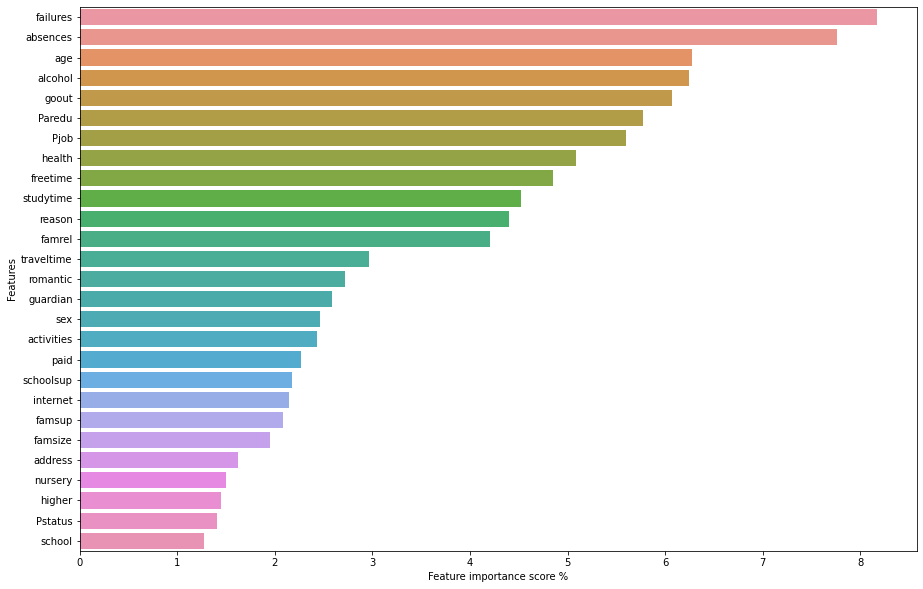

In [57]:
plt.figure(figsize=(15,10))
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.ylabel('Features')
plt.xlabel('Feature importance score %')
plt.show()

we can conclude that while building random forest and decision tree models, since the accuracy, f1 score and confusion matrix is better for random forest model . it is the best choice for prediction